# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
import alpaca_trade_api as tradeapi
api_key = "Ed9fbdab4562474a91f357e4f60df16e"
api = os.getenv("api_key")
print(api_key)

Ed9fbdab4562474a91f357e4f60df16e


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by = "relevancy")


In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en", sort_by = "relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

    bitcoin_df = pd.DataFrame(bitcoin_sentiments)
    bitcoin_df.head()

In [7]:
 columns = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[columns]
bitcoin_df.head()

,compound,negative,neutral,positive,text,date
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,2020-12-03
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,2020-12-16
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,2020-12-16
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,2020-12-17
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,2020-12-22


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

    ethereum_df = pd.DataFrame(ethereum_sentiments)
    ethereum_df.head()

In [9]:
ethereum_df = ethereum_df[columns]
ethereum_df.head()

,compound,negative,neutral,positive,text,date
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,2020-12-22
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23
3,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23
4,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,2020-12-19


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.279840,0.016700,0.898700,0.084550
std,0.349822,0.034697,0.081539,0.073757
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.835750,0.000000
50%,0.337550,0.000000,0.890000,0.082000
75%,0.554250,0.000000,1.000000,0.149000
max,0.801600,0.103000,1.000000,0.209000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.095020,0.009200,0.958750,0.032050
std,0.222685,0.028408,0.052504,0.044495
min,-0.493900,0.000000,0.849000,0.000000
25%,0.000000,0.000000,0.927000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.195925,0.000000,1.000000,0.063000
max,0.526700,0.099000,1.000000,0.136000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with mean score of .084550

Q: Which coin had the highest compound score?

A: Bitcoin with highest compound score of 0.801600

Q. Which coin had the highest positive score?

A: Bitcoin with the highest positive score of 0.209

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [15]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,2020-12-03,"[visahas, partnered, cryptocurrency, startup, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,2020-12-16,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,2020-12-16,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,2020-12-17,"[everything, dumb, worksas, come, close, crypt..."
4,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,2020-12-22,"[securities, exchange, commission, plan, sue, ..."


In [16]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,date,tokens
0,0.5267,0.000,0.864,0.136,The Securities and Exchange Commission plans t...,2020-12-22,"[securities, exchange, commission, plan, sue, ..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,2020-11-23,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,2020-11-23,"[london, reuters, digital, currency, ethereum,..."
4,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,2020-12-19,"[bitcoin, wa, derided, serious, investor, bubb..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(20)))

{('virtual', 'currency'): 5, ('photo', 'representation'): 4, ('alltime', 'high'): 3, ('char', 'reuters'): 3, ('reuters', 'stafffile'): 3, ('stafffile', 'photo'): 3, ('illustration', 'taken'): 3, ('seen', 'illustration'): 3, ('digital', 'currency'): 2, ('new', 'alltime'): 2, ('representation', 'virtual'): 2, ('currency', 'bitcoin'): 2, ('bitcoin', 'seen'): 2, ('taken', 'november'): 2, ('november', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 2, ('reuters', 'bitcoin'): 2, ('char', 'posted'): 2, ('representation', 'ethereum'): 2, ('ethereum', 'virtual'): 2}


In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(20)))

{('virtual', 'currency'): 11, ('photo', 'representation'): 8, ('currency', 'bitcoin'): 8, ('illustration', 'taken'): 8, ('reutersdado', 'ruvicillustrationlondon'): 7, ('ruvicillustrationlondon', 'reuters'): 7, ('bitcoin', 'seen'): 7, ('char', 'file'): 6, ('file', 'photo'): 6, ('representation', 'virtual'): 5, ('taken', 'november'): 5, ('november', 'reutersdado'): 5, ('seen', 'illustration'): 4, ('char', 'new'): 4, ('new', 'york'): 4, ('char', 'reuters'): 4, ('reuters', 'stafffile'): 4, ('stafffile', 'photo'): 4, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3}


In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 8),
 ('ha', 7),
 ('currency', 7),
 ('cryptocurrency', 6),
 ('alltime', 5),
 ('november', 5),
 ('year', 5),
 ('virtual', 5)]

In [22]:
# Get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 20),
 ('reuters', 16),
 ('bitcoin', 14),
 ('photo', 13),
 ('currency', 12),
 ('virtual', 11),
 ('taken', 11),
 ('illustration', 10),
 ('reutersdado', 10),
 ('seen', 9)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

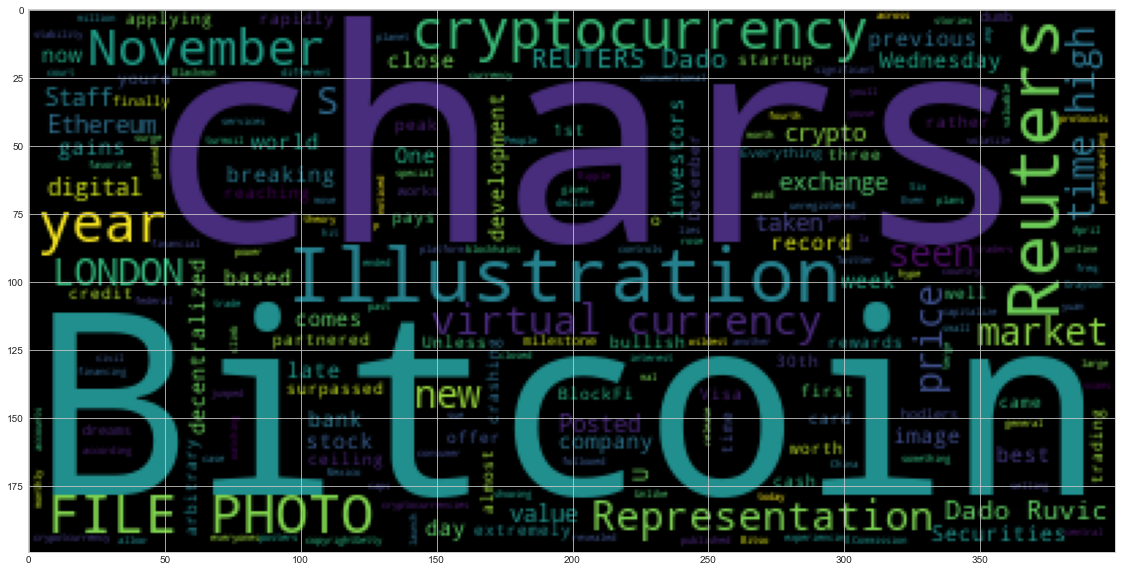

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

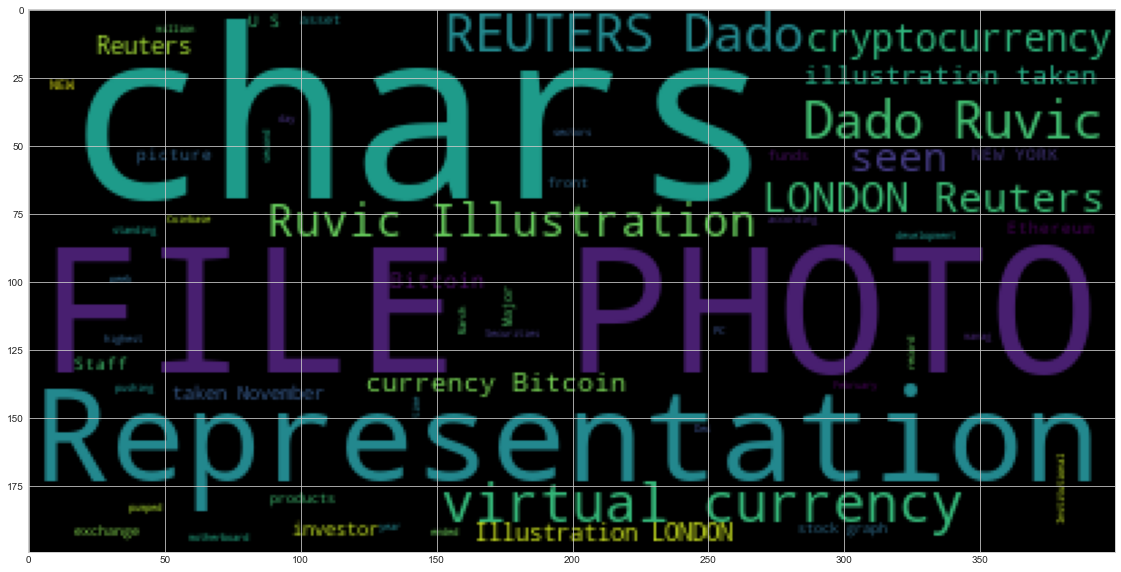

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to 

In [30]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent')

In [33]:
# List all Entities
print([ent.text for ent in doc.ents])

['Visa', 'first', 'Bitcoin', 'November 30th, 2020', 'December 1st', '2020', 'bitcoin', 'above $20,000', 'almost three years', 'the day', 'Bitcoin', '20,000', 'Wednesday', '2020', 'late-year', 'Bitcoin', 'over $23,000', 'The Securities and Exchange Commission', 'digital yuan', 'the People’s Bank of China', 'the past few weeks', 'bitcoin', 'digital', 'hype', 'Bitcoin', '20,000', '14,800', 'more than 170%', 'this year', 'Six years', 'Mexico', '$62 million', 'Decentralized', '4', 'U.S.', 'November', 'today', '500', '10.8 percent', 'November', 'monthly', 'April', 'fourth', 'Grayson Blackmon /', 'the year', 'the day', 'Twitter', '6', '6', 'one', 'above $20,000', 'Wednesday', 'a year', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reu', 'Reuters', 'Bitcoin', 'U.S.', 'January 6, 2020', 'REUTERS/', 'Dado Ruvic/File Photo', 'LONDON', 'Reuters', 'Bitcoin', 'Bitcoin', 'this week', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'Bitcoin', 'John Ve

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

"The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment 

In [35]:
# Run the NER processor on all of the text
doc_1 = nlp(ethereum_text)
# Add a title to the document
doc_1.user_data["title"] = "Ethereum NER"

AttributeError: 'str' object has no attribute 'user_data'

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f